<a href="https://colab.research.google.com/github/manoj7pal/Google-Colab-Notebooks/blob/master/Data_Analysis_Projects/Analyzing_Police_Activity_with_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyzing Police Activity with pandas

In [1]:
import pandas as pd

## 1. Load the Data

In [2]:
# Datasets

police_stops_ri = pd.read_csv('https://assets.datacamp.com/production/repositories/1497/datasets/62bd9feef451860db02d26553613a299721882e8/police.csv', parse_dates = True)
weather_ri = pd.read_csv('https://assets.datacamp.com/production/repositories/1497/datasets/02f3fb2d4416d3f6626e1117688e0386784e8e55/weather.csv', parse_dates = True)

police_stops_ri.shape, weather_ri.shape

((91741, 15), (4017, 27))

In [3]:
police_stops_ri.head()

,state,stop_date,stop_time,county_name,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,RI,2005-01-04,12:55,NaN,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,RI,2005-01-23,23:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2,RI,2005-02-17,04:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
3,RI,2005-02-20,17:15,NaN,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
4,RI,2005-02-24,01:20,NaN,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3


In [4]:
weather_ri.head()

,STATION,DATE,TAVG,TMIN,TMAX,AWND,WSF2,WT01,WT02,WT03,WT04,WT05,WT06,WT07,WT08,WT09,WT10,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22
0,USW00014765,2005-01-01,44.0,35,53,8.95,25.1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USW00014765,2005-01-02,36.0,28,44,9.40,14.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN
2,USW00014765,2005-01-03,49.0,44,53,6.93,17.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
3,USW00014765,2005-01-04,42.0,39,45,6.93,16.1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,USW00014765,2005-01-05,36.0,28,43,7.83,17.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN


## 2. Preparing the Data
  a. Examine the Data.<br/> 
  b. Clean the Data. 

In [5]:
# Locate missing Values
print(police_stops_ri.isna().sum())
# print(weather_ri.isna().sum())

state                     0
stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5205
driver_race            5202
violation_raw          5202
violation              5202
search_conducted          0
search_type           88434
stop_outcome           5202
is_arrested            5202
stop_duration          5202
drugs_related_stop        0
district                  0
dtype: int64


In [6]:
police_stops_ri.groupby('search_conducted').search_type.count()

# Conclusion:  When Search Conducted is NO, then SEarch type is NaN, otherwise it has some values. SO we will keep this value.

search_conducted
False       0
True     3307
Name: search_type, dtype: int64

In [7]:
""" 
Drop irrelevant columns
  - County name: Missing Values
  - State: Dataset is of RI only
  - search_type: Lots of missing values  - but it has dependecy on Search Conducted fields. Refer above cell.
"""
print(police_stops_ri.shape)
police_stops_ri.drop(labels = ['state', 'county_name'], axis = 'columns', inplace=True)
print(police_stops_ri.shape)

(91741, 15)
(91741, 13)


In [8]:
"""
The driver_gender column will be critical to many of your analyses. Because only a small fraction of rows are missing driver_gender, we'll drop those rows from the dataset.
"""

police_stops_ri.dropna(subset = ['driver_gender'], axis= 'rows', inplace=True)
print(police_stops_ri.shape)
print(police_stops_ri.isna().sum())

(86536, 13)
stop_date                 0
stop_time                 0
driver_gender             0
driver_race               0
violation_raw             0
violation                 0
search_conducted          0
search_type           83229
stop_outcome              0
is_arrested               0
stop_duration             0
drugs_related_stop        0
district                  0
dtype: int64


In [9]:
print(police_stops_ri.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86536 entries, 0 to 91740
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   stop_date           86536 non-null  object
 1   stop_time           86536 non-null  object
 2   driver_gender       86536 non-null  object
 3   driver_race         86536 non-null  object
 4   violation_raw       86536 non-null  object
 5   violation           86536 non-null  object
 6   search_conducted    86536 non-null  bool  
 7   search_type         3307 non-null   object
 8   stop_outcome        86536 non-null  object
 9   is_arrested         86536 non-null  object
 10  stop_duration       86536 non-null  object
 11  drugs_related_stop  86536 non-null  bool  
 12  district            86536 non-null  object
dtypes: bool(2), object(11)
memory usage: 8.1+ MB
None


In [10]:
# Fixing Data Types
  # Stop Date and time to Date time
  # is-arrested  to bool

# police_stops_ri['stop_date'] = pd.to_datetime(police_stops_ri.stop_date)
# police_stops_ri['stop_time'] = pd.to_datetime(police_stops_ri.stop_time)

police_stops_ri['is_arrested'] = police_stops_ri.is_arrested.astype('bool')

print(police_stops_ri.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86536 entries, 0 to 91740
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   stop_date           86536 non-null  object
 1   stop_time           86536 non-null  object
 2   driver_gender       86536 non-null  object
 3   driver_race         86536 non-null  object
 4   violation_raw       86536 non-null  object
 5   violation           86536 non-null  object
 6   search_conducted    86536 non-null  bool  
 7   search_type         3307 non-null   object
 8   stop_outcome        86536 non-null  object
 9   is_arrested         86536 non-null  bool  
 10  stop_duration       86536 non-null  object
 11  drugs_related_stop  86536 non-null  bool  
 12  district            86536 non-null  object
dtypes: bool(3), object(10)
memory usage: 7.5+ MB
None


In [11]:
# Combine stop_date and time - Convert to datetime format - Creating a DateTimeIndex 

police_stops_ri['stop_date_time'] = police_stops_ri.stop_date.str.cat(police_stops_ri.stop_time, sep= ' ')
police_stops_ri['stop_date_time'] = pd.to_datetime(police_stops_ri['stop_date_time'])
police_stops_ri.set_index('stop_date_time', inplace = True)

#police_stops_ri.drop(labels = ['stop_date', 'stop_time'], axis = 'columns', inplace=True)
police_stops_ri.head()

,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
stop_date_time,,,,,,,,,,,,,
2005-01-04 12:55:00,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
2005-01-23 23:15:00,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2005-02-17 04:15:00,2005-02-17,04:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
2005-02-20 17:15:00,2005-02-20,17:15,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
2005-02-24 01:20:00,2005-02-24,01:20,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3


## 3. Analysis
  


- #### **1. Does the genders affects the Speeding Violation - Outcomes?**

In [12]:
# Unique Values: Suited for Categorical values
print(police_stops_ri.violation.value_counts())

Speeding               48423
Moving violation       16224
Equipment              10921
Other                   4409
Registration/plates     3703
Seat belt               2856
Name: violation, dtype: int64


In [13]:
print(police_stops_ri.violation.value_counts(normalize=True) * 100)

Speeding               55.957058
Moving violation       18.748267
Equipment              12.620181
Other                   5.094989
Registration/plates     4.279144
Seat belt               3.300361
Name: violation, dtype: float64


In [14]:
# Proportion or Percentages of Values of a column
print(police_stops_ri.stop_outcome.value_counts(normalize=True) * 100)

Citation            89.085467
Warning              5.935102
Arrest Driver        3.160534
No Action            0.721087
N/D                  0.701442
Arrest Passenger     0.396367
Name: stop_outcome, dtype: float64


In [15]:
# Speeding and Gender Wise - Outcome Proportion
male_speeding = police_stops_ri[ (police_stops_ri.driver_gender == 'M') & (police_stops_ri.violation == 'Speeding') ]
female_speeding = police_stops_ri[ (police_stops_ri.driver_gender == 'F') & (police_stops_ri.violation == 'Speeding') ]

all = pd.DataFrame()
all['Male %'] = male_speeding.stop_outcome.value_counts(normalize=True) * 100
all['Female %'] = female_speeding.stop_outcome.value_counts(normalize=True) * 100

print(all.head())

# Conclusion:  NO - When commited Speeding Violations, the outcome remains the same for both the genders.

                     Male %   Female %
Citation          94.459530  95.219225
Warning            3.618391   4.007414
Arrest Driver      1.589529   0.575227
Arrest Passenger   0.128139   0.063914
No Action          0.106782   0.038348


- #### **2. Does the genders commit different violations?**

In [16]:
# Gender Wise Violations %
male = police_stops_ri[(police_stops_ri.driver_gender == 'M')]
female = police_stops_ri[(police_stops_ri.driver_gender == 'F')]

all = pd.DataFrame()
all['Male %'] = male.violation.value_counts(normalize=True) * 100
all['Female %'] = female.violation.value_counts(normalize=True) * 100
print(all)

# Conclusion:  Female driveres tend to breach Speeding Violations more than Male drivers, whereas the case is otherwise for Moving Violations.

                        Male %   Female %
Speeding             52.224276  65.811391
Moving violation     20.614385  13.821822
Equipment            13.415761  10.519896
Other                 5.898474   2.973837
Registration/plates   4.217520   4.441827
Seat belt             3.629585   2.431227


- #### **3. Does the genders affects Arrest - for different violations?**

In [17]:
# Arrest % - Gender Wise
male_arrest = police_stops_ri[(police_stops_ri.driver_gender == 'M') & (police_stops_ri.is_arrested == True)]
female_arrest = police_stops_ri[(police_stops_ri.driver_gender == 'F') & (police_stops_ri.is_arrested == True)]

all = pd.DataFrame()
all['Male %'] = male_arrest.violation.value_counts(normalize=True) * 100
all['Female %'] = female_arrest.violation.value_counts(normalize=True) * 100
print(all)

# Conclusion:  NO, exception being Speeeding violations - in which there are more Male arrests than females.

                        Male %   Female %
Moving violation     30.136986  31.988042
Speeding             23.370693  14.947683
Equipment            22.415940  25.261584
Other                11.207970  12.107623
Registration/plates  10.294728  13.751868
Seat belt             2.573682   1.943199


- #### **4. Does Gender affects whose vehicle is searched ?**</br>


In [18]:
all = pd.DataFrame()
all['Male %'] = male.search_conducted.value_counts(normalize=True) * 100
all['Female %'] = female.search_conducted.value_counts(normalize=True) * 100
all['Total %'] = police_stops_ri.search_conducted.value_counts(normalize=True) * 100
print(all)

# Conclusion:  Male driver vehicles are searched more than twice as female driers. Below analaysis shows the male drivers search rate is the same for different violations.

          Male %   Female %    Total %
False  95.457442  98.081938  96.178469
True    4.542558   1.918062   3.821531


In [19]:
police_stops_ri.search_conducted.mean() * 100 # Total Search Rate

3.82153092354627

In [20]:
male.search_conducted.mean() * 100 # Male Search Rate

4.542557598546892

In [21]:
female.search_conducted.mean() * 100  # Female Search Rate

1.9180617481282074

In [22]:
police_stops_ri.groupby('driver_gender').search_conducted.mean() * 100

driver_gender
F    1.918062
M    4.542558
Name: search_conducted, dtype: float64

###### Conclusion: Wow! Male drivers are searched more than twice as often as female drivers. Why might this be?

In [23]:
# Calculate the search rate for each combination of gender and violation
print(police_stops_ri.groupby([ 'violation', 'driver_gender']).search_conducted.mean() * 100)

violation            driver_gender
Equipment            F                 3.998401
                     M                 7.149644
Moving violation     F                 3.925746
                     M                 6.152419
Other                F                 4.101839
                     M                 4.619125
Registration/plates  F                 5.492424
                     M                10.880242
Seat belt            F                 1.730104
                     M                 3.511853
Speeding             F                 0.830883
                     M                 2.788541
Name: search_conducted, dtype: float64


- #### **5. Does gender affect who is frisked during a search?**


In [24]:
police_stops_ri.search_conducted.value_counts(), police_stops_ri.search_type.value_counts(dropna = False)

(False    83229
 True      3307
 Name: search_conducted, dtype: int64,
 NaN                                                         83229
 Incident to Arrest                                           1290
 Probable Cause                                                924
 Inventory                                                     219
 Reasonable Suspicion                                          214
 Protective Frisk                                              164
 Incident to Arrest,Inventory                                  123
 Incident to Arrest,Probable Cause                             100
 Probable Cause,Reasonable Suspicion                            54
 Probable Cause,Protective Frisk                                35
 Incident to Arrest,Inventory,Probable Cause                    35
 Incident to Arrest,Protective Frisk                            33
 Inventory,Probable Cause                                       25
 Protective Frisk,Reasonable Suspicion                    

In [25]:
# When Search Conducted is False, then Search type is NaN --> Hence, No rows for below case.

police_stops_ri[(police_stops_ri.search_conducted == True) & (police_stops_ri.search_type.isna())]

,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
stop_date_time,,,,,,,,,,,,,


In [26]:
# Only Inventory Searches

police_stops_ri['Inventory_Searched'] = police_stops_ri.search_type.str.contains('Inventory', case=False, na=False) 
print(f"Total inventory searches: {police_stops_ri.Inventory_Searched.sum()}")

# Percentages - out of toal types of search conducted
print(f"Inventory search % out of total search conducted: {police_stops_ri[police_stops_ri.search_conducted == True].Inventory_Searched.mean() * 100}%")

Total inventory searches: 441
Inventory search % out of total search conducted: 13.335349259147264%


In [27]:
# During a vehicle search, the police officer may pat down the driver to check if they have a weapon. This is known as a "protective frisk."
# Search for Protective Frisk
police_stops_ri['Protective_Frisk'] = police_stops_ri.search_type.str.contains('Protective Frisk', case = False, na = False)
print(f"Total Protective-Frisk: {police_stops_ri.Protective_Frisk.sum()}")

# Percentages - out of total types of search conducted
print(f"Protective-Frisk % out of total search conducted: {police_stops_ri[police_stops_ri.search_conducted == True].Protective_Frisk.mean() * 100}%\n")

# Frisks - genderwise
print(f"Frisk rate, gender-wise: \n{police_stops_ri[police_stops_ri.search_conducted == True].groupby('driver_gender').Protective_Frisk.mean() * 100}")

# Cocnlcusion: Though we can see that Males Frisking Rate is much higher than Females, this rate cannot be totally dependent on the gender.

Total Protective-Frisk: 303
Protective-Frisk % out of total search conducted: 9.162382824312065%

Frisk rate, gender-wise: 
driver_gender
F    7.456140
M    9.435286
Name: Protective_Frisk, dtype: float64


- #### **6. Does time of day affect arrest rate?**

In [28]:
# Overall Arrest Rate
print(f"Overll Arrest-Daret: {police_stops_ri.is_arrested.mean() * 100}%")

Overll Arrest-Daret: 3.55690117407784%


In [29]:
police_stops_ri.index.hour

Int64Index([12, 23,  4, 17,  1, 10, 21, 21, 11, 19,
            ...
            13, 18, 19, 20, 20, 21, 21, 22, 22, 22],
           dtype='int64', name='stop_date_time', length=86536)

stop_date_time
1     6.493185
21    6.454062
2     6.079821
3     6.054872
0     5.143094
22    4.866608
4     4.800000
23    4.759152
5     4.278075
17    4.061896
18    3.820439
20    3.810734
12    3.739931
16    3.528084
19    3.224490
13    3.077599
15    3.067871
14    3.060458
11    2.889667
10    2.821272
9     2.520616
8     2.185350
6     1.381304
7     1.303155
Name: is_arrested, dtype: float64


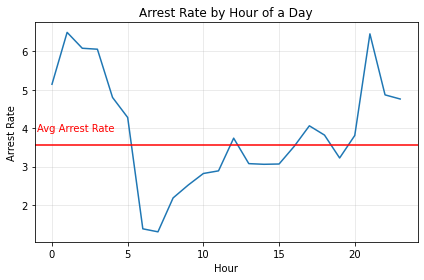

In [30]:
# Arrest % - Hourly basisri.inex
arrest_rate_hour = police_stops_ri.groupby(police_stops_ri.index.hour).is_arrested.mean() * 100
print(arrest_rate_hour.sort_values(ascending=False))

import matplotlib.pyplot as plt 
arrest_rate_hour.plot()

plt.xlabel('Hour')
plt.ylabel('Arrest Rate')
plt.title('Arrest Rate by Hour of a Day')

plt.tight_layout()
plt.grid(alpha=0.3)
plt.axhline(police_stops_ri.is_arrested.mean() * 100 , c='r')
plt.text(-1, police_stops_ri.is_arrested.mean() * 110, 'Avg Arrest Rate', c= 'r')
plt.show()

#  Conclusion: The arrest rate has a significant spike overnight, and then dips in the early morning hours.

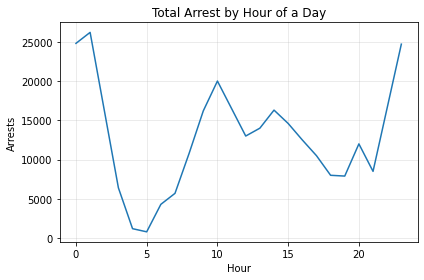

In [31]:
arrest_hour_count = police_stops_ri.groupby(police_stops_ri.index.hour).is_arrested.sum() * 100
arrest_hour_count.plot()

plt.xlabel('Hour')
plt.ylabel('Arrests')
plt.title('Total Arrest by Hour of a Day')

plt.tight_layout()
plt.grid(alpha=0.3)
plt.show()


In [32]:
print(police_stops_ri.groupby(police_stops_ri.index.month).is_arrested.count().sort_values(ascending=False))

stop_date_time
1     7903
11    7590
5     7471
10    7338
3     7332
7     7197
9     7176
8     7164
6     7065
4     7007
12    6689
2     6604
Name: is_arrested, dtype: int64


In [33]:
print(police_stops_ri.groupby(police_stops_ri.index.year).is_arrested.count().sort_values(ascending=False))

stop_date_time
2012    10382
2006    10058
2007     9034
2014     8679
2008     8261
2015     8071
2011     7707
2013     7561
2009     7180
2010     7142
2005     2461
Name: is_arrested, dtype: int64


- #### **7. Are drug-related stops on the rise?**


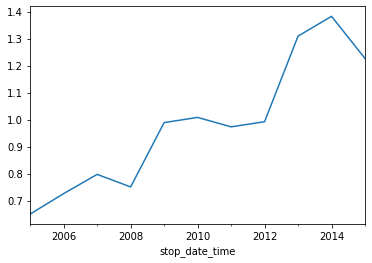

In [34]:
yearly_drug_stops_rate = police_stops_ri.drugs_related_stop.resample('A').mean() * 100
yearly_drug_stops_rate.plot()
plt.show()

#Conclusion: The rate of drug-related stops nearly doubled over the course of 10 years. 

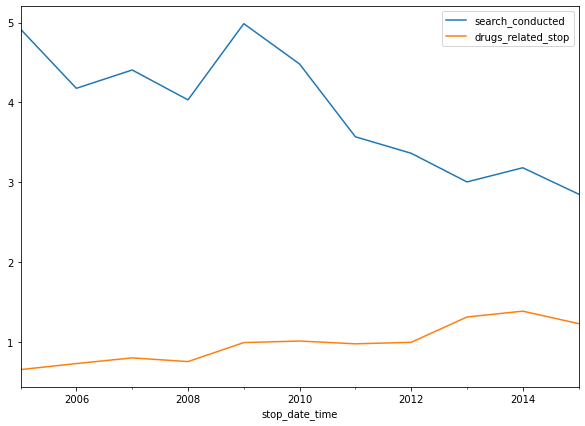

In [35]:
# Comparing drug and search rates:  The rate of drug-related stops increased significantly between 2005 and 2015. 
# You might hypothesize that the rate of vehicle searches was also increasing, which would have led to an increase in drug-related stops even if more drivers were not carrying drugs.

annual_search_rate = police_stops_ri.search_conducted.resample('A').mean() * 100

annual = pd.concat([annual_search_rate, yearly_drug_stops_rate, ], axis = 'columns')
annual.plot(figsize = (10,7))
plt.show()

# Conclusion: The rate of drug-related stops increased even though the search rate decreased, disproving our hypothesis. This is concerning!!!

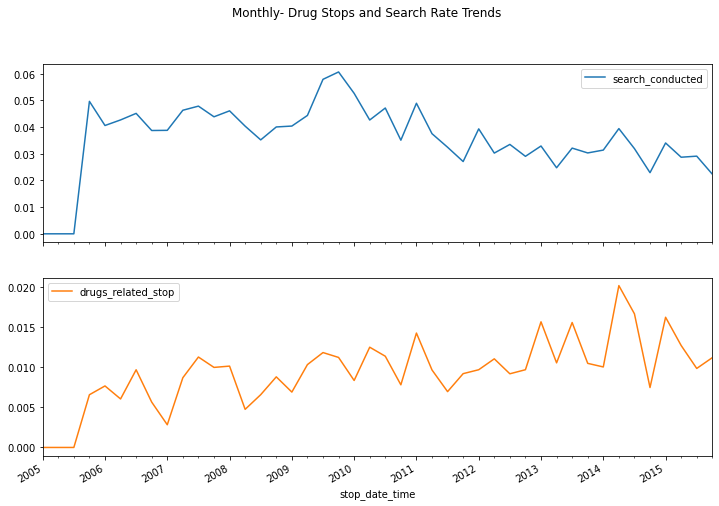

In [36]:
#Practice

quarterly_drug_stops_rate = police_stops_ri.drugs_related_stop.resample('Q').mean()
quarterly_search_rate = police_stops_ri.search_conducted.resample('Q').mean()
quarter = pd.concat([quarterly_search_rate, quarterly_drug_stops_rate],  axis = 'columns')

quarter.plot(subplots = True, figsize = (12,8), title = 'Monthly- Drug Stops and Search Rate Trends')
plt.show()

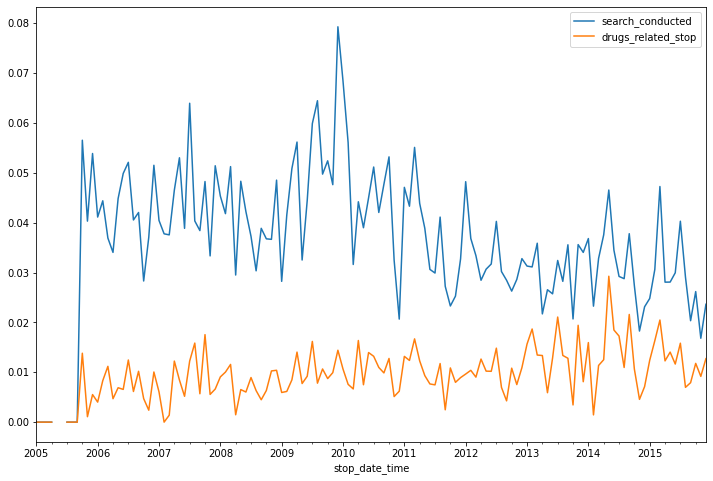

In [37]:
monthly_drug_stops = police_stops_ri.drugs_related_stop.resample('M').mean()
monthly_search_rate = police_stops_ri.search_conducted.resample('M').mean()

monthly = pd.concat([monthly_search_rate, monthly_drug_stops], axis = 'columns')

monthly.plot(figsize = (12,8))
plt.show()

- #### **8. What violations are caught in each district?**

In [38]:
police_stops_ri.columns

Index(['stop_date', 'stop_time', 'driver_gender', 'driver_race',
       'violation_raw', 'violation', 'search_conducted', 'search_type',
       'stop_outcome', 'is_arrested', 'stop_duration', 'drugs_related_stop',
       'district', 'Inventory_Searched', 'Protective_Frisk'],
      dtype='object')

In [39]:
# Crosstab(Frequency Table) : By Default, it gives the count of combination of values occur in a DF.
district_violation_ctab = pd.crosstab(police_stops_ri.district, police_stops_ri.violation )
district_violation_ctab

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
district,,,,,,
Zone K1,672,1254,290,120,0,5960
Zone K2,2061,2962,942,768,481,10448
Zone K3,2302,2898,705,695,638,12322
Zone X1,296,671,143,38,74,1119
Zone X3,2049,3086,769,671,820,8779
Zone X4,3541,5353,1560,1411,843,9795


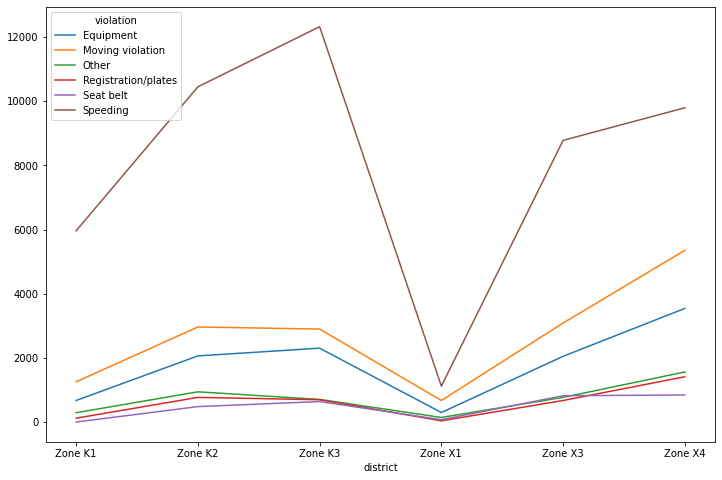

In [40]:
district_violation_ctab.plot(figsize = (12,8))

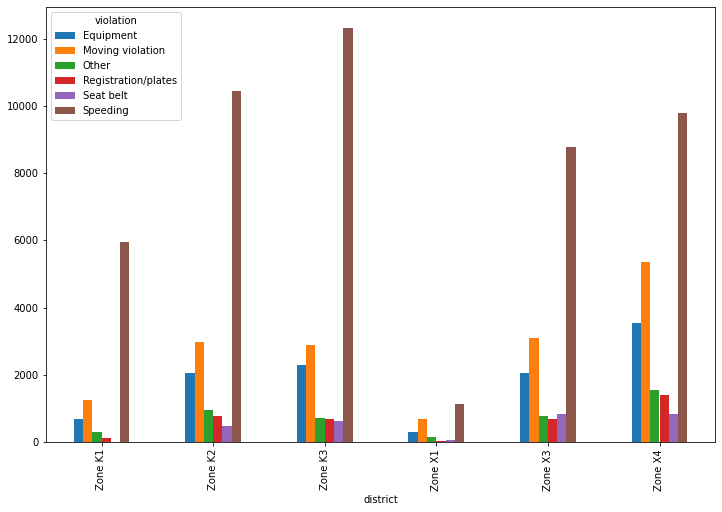

In [41]:
district_violation_ctab.plot(kind='bar' ,figsize = (12,8))

In [42]:
# After Speeding , Moving Violations remains comman breaches among all the districts.
# The vast majority of traffic stops in Zone K1 are for speeding, and all other zone  violation's  are remarkably similar to one another in terms of violations.

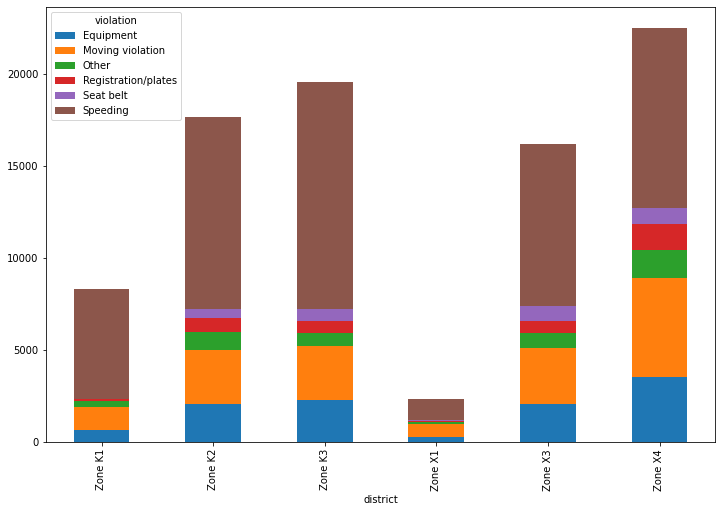

In [43]:
district_violation_ctab.plot(kind='bar' ,figsize = (12,8), stacked = True)

- #### **9. How long might you be stopped for a violation?**

In [44]:
police_stops_ri.columns

Index(['stop_date', 'stop_time', 'driver_gender', 'driver_race',
       'violation_raw', 'violation', 'search_conducted', 'search_type',
       'stop_outcome', 'is_arrested', 'stop_duration', 'drugs_related_stop',
       'district', 'Inventory_Searched', 'Protective_Frisk'],
      dtype='object')

In [45]:
violation_stop_duation_ctab = pd.crosstab(police_stops_ri.violation, police_stops_ri.stop_duration)
violation_stop_duation_ctab

stop_duration,0-15 Min,16-30 Min,30+ Min
violation,,,
Equipment,9087,1374,460
Moving violation,11799,3132,1293
Other,2551,1227,631
Registration/plates,2627,844,232
Seat belt,2579,250,27
Speeding,40934,6913,576


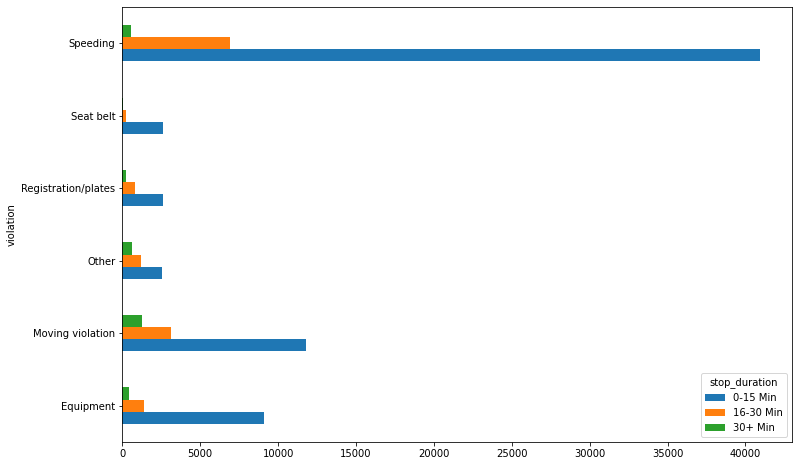

In [46]:
violation_stop_duation_ctab.plot(kind='barh', figsize=(12,8))

# For Speeding - Avg Stop duration is around 0-15 mins

- #### **10. Whether climate has impact on road stops?**

In [47]:
#Analyzing Weather data

weather_ri.shape, weather_ri.columns, weather_ri.head()

((4017, 27),
 Index(['STATION', 'DATE', 'TAVG', 'TMIN', 'TMAX', 'AWND', 'WSF2', 'WT01',
        'WT02', 'WT03', 'WT04', 'WT05', 'WT06', 'WT07', 'WT08', 'WT09', 'WT10',
        'WT11', 'WT13', 'WT14', 'WT15', 'WT16', 'WT17', 'WT18', 'WT19', 'WT21',
        'WT22'],
       dtype='object'),
        STATION        DATE  TAVG  TMIN  TMAX  ...  WT17  WT18  WT19  WT21  WT22
 0  USW00014765  2005-01-01  44.0    35    53  ...   NaN   NaN   NaN   NaN   NaN
 1  USW00014765  2005-01-02  36.0    28    44  ...   NaN   1.0   NaN   NaN   NaN
 2  USW00014765  2005-01-03  49.0    44    53  ...   NaN   NaN   NaN   NaN   NaN
 3  USW00014765  2005-01-04  42.0    39    45  ...   NaN   NaN   NaN   NaN   NaN
 4  USW00014765  2005-01-05  36.0    28    43  ...   NaN   1.0   NaN   NaN   NaN
 
 [5 rows x 27 columns])

In [48]:
#Fethcing Temperature Columns
temp = weather_ri[['TAVG', 'TMIN', 'TMAX']]
temp.describe()

,TAVG,TMIN,TMAX
count,1217.000000,4017.000000,4017.000000
mean,52.493016,43.484441,61.268608
std,17.830714,17.020298,18.199517
min,6.000000,-5.000000,15.000000
25%,39.000000,30.000000,47.000000
50%,54.000000,44.000000,62.000000
75%,68.000000,58.000000,77.000000
max,86.000000,77.000000,102.000000


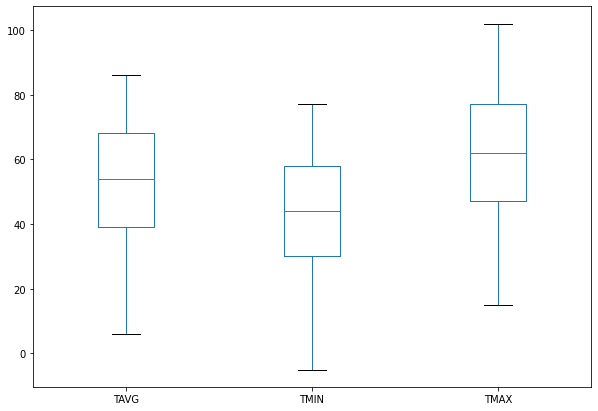

In [49]:
# Checkt the distribution, as well as presenece of any outliers
temp.plot(kind = 'box', figsize = (10,7))

# Conclusion : No Outliers. Also, The temperature data looks good so far: the TAVG values are in between TMIN and TMAX, and the measurements and ranges seem reasonable.
# Hence, the dataset seems trustworthy.

In [50]:
# The weather DataFrame contains 20 columns(One Hot Encoded) that start with 'WT', each of which represents a bad weather condition. e.g: WT05 indicates "Hail" , WT11 indicates "High or damaging winds", WT17 indicates "Freezing rain" etc

WT = weather_ri.loc[:, 'WT01':'WT22']
WT.shape

(4017, 20)

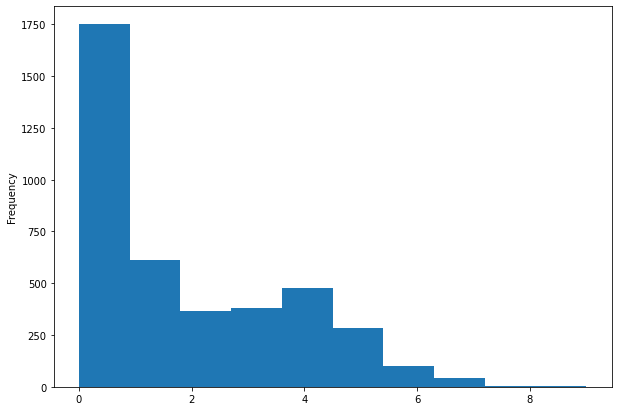

In [51]:
# Converting One Hot Encoded Field to Categorical Field - Bad Weathers. - DEpends on the dataset
# Summing all bad weather values to have a single column, and then we rate them in the next steps.
weather_ri['bad_conditions'] = WT.sum(axis = 'columns')
weather_ri['bad_conditions'] = weather_ri['bad_conditions'].fillna(0).astype('int')

weather_ri.bad_conditions.plot(kind='hist', figsize = (10,7))
plt.show()

# Conclusion:  It looks like many days didn't have any bad weather conditions(since there value sums up to ZERO), and only a small portion of days had more than four bad weather conditions.

In [52]:
"""
Convert 0 to 'good'
Convert 1 through 4 to 'bad'
Convert 5 through 9 to 'worse'
"""

weather_ri.loc[weather_ri['bad_conditions'] == 0, 'rating'] = 'good'
weather_ri.loc[(weather_ri['bad_conditions'] > 0) & (weather_ri['bad_conditions'] <= 4) , 'rating'] = 'bad'
weather_ri.loc[(weather_ri['bad_conditions'] >= 5) & (weather_ri['bad_conditions'] <= 9) , 'rating'] = 'worse'

weather_ri.rating.value_counts()

bad      1836
good     1749
worse     432
Name: rating, dtype: int64

In [53]:
#weather_ri['rating'] = weather_ri.rating.astype('category', categories= ['good', 'bad', 'worse'], ordered=True)

weather_ri['rating'] = pd.Categorical(weather_ri.rating, dtype = 'category', ordered=True, categories = ['good', 'bad', 'worse'])

weather_ri.rating.dtype

CategoricalDtype(categories=['good', 'bad', 'worse'], ordered=True)

In [54]:
# Merge and traffic stops data sets
print(police_stops_ri.shape)
police_stops_ri.head()

(86536, 15)


,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district,Inventory_Searched,Protective_Frisk
stop_date_time,,,,,,,,,,,,,,,
2005-01-04 12:55:00,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4,False,False
2005-01-23 23:15:00,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3,False,False
2005-02-17 04:15:00,2005-02-17,04:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4,False,False
2005-02-20 17:15:00,2005-02-20,17:15,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1,False,False
2005-02-24 01:20:00,2005-02-24,01:20,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3,False,False


In [55]:
weather_ri.head()

,STATION,DATE,TAVG,TMIN,TMAX,AWND,WSF2,WT01,WT02,WT03,WT04,WT05,WT06,WT07,WT08,WT09,WT10,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22,bad_conditions,rating
0,USW00014765,2005-01-01,44.0,35,53,8.95,25.1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,bad
1,USW00014765,2005-01-02,36.0,28,44,9.40,14.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,2,bad
2,USW00014765,2005-01-03,49.0,44,53,6.93,17.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,3,bad
3,USW00014765,2005-01-04,42.0,39,45,6.93,16.1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,4,bad
4,USW00014765,2005-01-05,36.0,28,43,7.83,17.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,4,bad


In [56]:
# WE want to merge both the dataframes on DATES, but we want only the date and rating column value from wather dataframes.

weather_rating = weather_ri.loc[:, ['DATE', 'rating']]
weather_rating.head()

,DATE,rating
0,2005-01-01,bad
1,2005-01-02,bad
2,2005-01-03,bad
3,2005-01-04,bad
4,2005-01-05,bad


In [57]:
 police_stops_ri.reset_index(inplace = True)
 police_stops_ri.head()

,stop_date_time,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district,Inventory_Searched,Protective_Frisk
0,2005-01-04 12:55:00,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4,False,False
1,2005-01-23 23:15:00,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3,False,False
2,2005-02-17 04:15:00,2005-02-17,04:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4,False,False
3,2005-02-20 17:15:00,2005-02-20,17:15,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1,False,False
4,2005-02-24 01:20:00,2005-02-24,01:20,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3,False,False


In [58]:

police_stops_weather_ri = pd.merge(left = police_stops_ri, right = weather_rating, left_on = 'stop_date', right_on = 'DATE', how = 'left')
police_stops_weather_ri.set_index('stop_date_time', drop=True, inplace=True)

print(police_stops_weather_ri.shape)
police_stops_weather_ri.head()

(86536, 17)


,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district,Inventory_Searched,Protective_Frisk,DATE,rating
stop_date_time,,,,,,,,,,,,,,,,,
2005-01-04 12:55:00,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4,False,False,2005-01-04,bad
2005-01-23 23:15:00,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3,False,False,2005-01-23,worse
2005-02-17 04:15:00,2005-02-17,04:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4,False,False,2005-02-17,good
2005-02-20 17:15:00,2005-02-20,17:15,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1,False,False,2005-02-20,bad
2005-02-24 01:20:00,2005-02-24,01:20,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3,False,False,2005-02-24,bad


In [59]:
# Now we can easily analyze the police behavior and weathers correlation.
# Does the weather affect the Arrest rate ?


print(f"Overall Arrest Rate: {police_stops_weather_ri.is_arrested.mean()}")
print('-'*40)
print(f"Arrest rate for each Weather Rating: ")
print(police_stops_weather_ri.groupby('rating').is_arrested.mean())
print('-'*40)
print(f"Arrest rate for each combination of Violation and Weather rating: ")
print(police_stops_weather_ri.groupby(['violation', 'rating']).is_arrested.mean())


Overall Arrest Rate: 0.0355690117407784
----------------------------------------
Arrest rate for each Weather Rating: 
rating
good     0.033715
bad      0.036261
worse    0.041667
Name: is_arrested, dtype: float64
----------------------------------------
Arrest rate for each combination of Violation and Weather rating: 
violation            rating
Equipment            good      0.059007
                     bad       0.066311
                     worse     0.097357
Moving violation     good      0.056227
                     bad       0.058050
                     worse     0.065860
Other                good      0.076966
                     bad       0.087443
                     worse     0.062893
Registration/plates  good      0.081574
                     bad       0.098160
                     worse     0.115625
Seat belt            good      0.028587
                     bad       0.022493
                     worse     0.000000
Speeding             good      0.013405
          

In [60]:
pd.crosstab(index = police_stops_weather_ri.violation, columns = police_stops_weather_ri.rating, values= police_stops_weather_ri.is_arrested * 100 , aggfunc='mean')

rating,good,bad,worse
violation,,,
Equipment,5.900682,6.631143,9.735744
Moving violation,5.622708,5.804964,6.586022
Other,7.696567,8.744281,6.289308
Registration/plates,8.157444,9.815951,11.562500
Seat belt,2.858744,2.249297,0.000000
Speeding,1.340458,1.331436,1.688596


## **Conclusion:** Wow!!!, The arrest rate increases as the weather gets worse, and that trend persists across many of the violation types. This doesn't prove a causal link, but it's quite an interesting result!